In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys

In [2]:
s = 'flu_data.csv'
df = pd.read_csv(s)
df.head()

,Student,Vaccin,HndWshQual,HndWshFreq,SociDist,NoFaceContact,RespEttiqu,PersnDist,HandSanit,Risk,Complications,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Sick,Flu,Female
0,1,3,4,4,2,1,5,1,1,-0.770,-1.453,0.000,0.929,-0.554,0.000,0.0,0.0,1.0
1,2,2,4,4,5,2,5,4,4,-0.345,0.000,-0.489,0.149,-0.554,1.482,1.0,0.0,0.0
2,3,3,2,2,2,3,2,2,1,-0.406,-0.575,-0.234,0.693,-0.182,-1.482,0.0,0.0,0.0
3,4,3,3,2,2,2,5,3,1,-0.575,-0.197,-0.429,0.000,0.554,0.000,2.0,1.0,NaN
4,5,2,5,3,3,2,5,5,3,0.000,-0.770,0.097,0.546,0.554,0.684,1.0,0.0,0.0


In [3]:
key1=['Risk','NoFaceContact','Sick']
d1=pd.DataFrame(df[key1])
d1.isnull().sum()

Risk              0
NoFaceContact     0
Sick             36
dtype: int64

In [4]:
d1['Sick'].fillna(value=np.mean(d1['Sick']),inplace=True)

In [5]:
def clustercentroid(cluster):
 x = [c[0] for c in cluster]
 y = [c[1] for c in cluster]
 z = [c[2] for c in cluster]
 size = len(cluster)
 cx = sum(x)/size
 cy = sum(y)/size
 cz = sum(z)/size
 return [cx,cy,cz]

[[-0.0699254901960784, 1.6470588235294117, 0.9791338995491249], [-0.15969677419354839, 3.7870967741935484, 0.9989649818871831]]


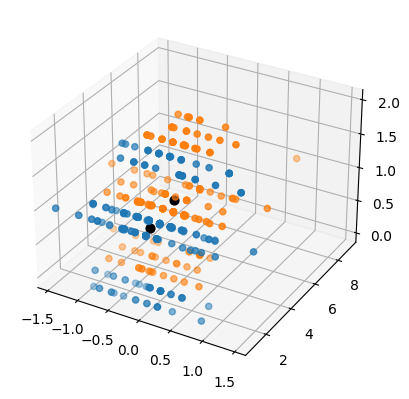

In [9]:
def kmeans(d,k,maxiter):
    data=np.array(d)
    n,m=data.shape
    centers=[[] for i in range(k)]
    for i in range(k):
        centers[i]=data[i,:]
    clusters=[[] for i in range(k)]
    dc=[[] for i in range(n)]
    cent=[[] for i in range(k)]
    distances=[[[] for j in range(k)] for i in range(n)]
    for iter in range(maxiter):
        clusters=[[] for i in range(k)]    
        for i in range(n):
            for j in range(k):
                distances[i][j]=math.sqrt(((centers[j][0]-data[i,0])*(centers[j][0]-data[i,0]))+((centers[j][1]-data[i,1])*(centers[j][1]-data[i,1]))+((centers[j][2]-data[i,2])*(centers[j][2]-data[i,2])))
            dc=distances[i] 
            clusters[dc.index(min(dc))].append([data[i,0],data[i,1],data[i,2]]) 
        for i in range(k):
            cent[i]=clustercentroid(clusters[i])     
        centers=cent        
    x=[[] for i in range(k)]
    y=[[] for i in range(k)]
    z=[[] for i in range(k)]
    for i in range(k):
        for j in range(len(clusters[i])):
                x[i].append(clusters[i][j][0])
                y[i].append(clusters[i][j][1])
                z[i].append(clusters[i][j][2])
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    print(centers)
    for i in range(k):
            ax.scatter(x[i],y[i],z[i])
            ax.scatter(centers[i][0],centers[i][1],centers[i][2], c='black', marker='o',s=40)        
    plt.show()  
kmeans(d1,2,100)